<a href="https://colab.research.google.com/github/gnonname/Examen_Big_Data/blob/main/BANK_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## We're Charging some needed library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Banques.csv")


### Preprocessing

In [ ]:
df = data.copy()
df.head()

,Age,Sexe,Statut_matrimonial,Avez-vous un handicap,Niveau d'instruction,Nationalite,Langues parlees,Loisirs,Revenu,Profession,Logement,Milieu d'habitation,Etat Sante,Vehicule,NPAcharge,Biens_immobiliers,Antecedent judiciaire,Type de delit,Activite Secondaire,Accident,Deja Pris un credit,Favorable_au_credit,Disposez_compte_banque,Type_compte,Favorable_carte_bancaire,Etes_vous_assurez,NB_transactions_mensuelles,Montant_Plus_Eleve_Compte,Compte_en_commun,Compte_autre_banque,Credit_ autre_banque,Telephone_portable,Compte_facebook,Bon_client
0,5,2,4,2,3,1,1,4,4,1,1,2,5,1,17,1,2,7,2,2,2,1,1,2,2,1,20,3,2,2,2,1,2,0
1,1,2,4,1,1,2,1,7,5,4,2,1,5,2,11,2,1,5,1,1,2,2,2,7,7,2,77,7,2,2,2,2,1,0
2,4,1,5,1,2,2,1,2,6,2,1,2,1,2,6,1,1,4,2,1,1,2,2,7,7,1,77,7,2,2,2,1,2,0
3,1,2,3,1,1,2,2,6,6,7,3,2,4,1,9,1,2,7,1,1,2,2,1,2,1,2,19,4,2,1,2,2,1,1
4,5,1,5,2,4,1,2,10,6,9,3,1,1,1,8,1,2,7,2,1,1,2,1,2,2,1,7,3,1,1,2,2,1,1


In [ ]:
missing_rate = df.isna().sum()/df.shape[0]

In [ ]:
missing_rate

Age                           0.0
Sexe                          0.0
Statut_matrimonial            0.0
Avez-vous un handicap         0.0
Niveau d'instruction          0.0
Nationalite                   0.0
Langues parlees               0.0
Loisirs                       0.0
Revenu                        0.0
Profession                    0.0
Logement                      0.0
Milieu d'habitation           0.0
Etat Sante                    0.0
Vehicule                      0.0
NPAcharge                     0.0
Biens_immobiliers             0.0
Antecedent judiciaire         0.0
Type de delit                 0.0
Activite Secondaire           0.0
Accident                      0.0
Deja Pris un credit           0.0
Favorable_au_credit           0.0
Disposez_compte_banque        0.0
Type_compte                   0.0
Favorable_carte_bancaire      0.0
Etes_vous_assurez             0.0
NB_transactions_mensuelles    0.0
Montant_Plus_Eleve_Compte     0.0
Compte_en_commun              0.0
Compte_autre_b

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
trainset['Bon_client'].value_counts()

1    10761
0    10640
Name: Bon_client, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [ ]:
model_1 = RandomForestClassifier(random_state=0)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def preprocessing(df):
    
    #df = encodage(df)
    #df = feature_engineering(df)
    #df = imputation(df)
    
    X = df.drop('Bon_client', axis=1)
    y = df['Bon_client']
    
    print(y.value_counts())
    
    return X, y

In [ ]:
X_train, y_train = preprocessing(trainset)

1    10761
0    10640
Name: Bon_client, dtype: int64


In [ ]:
X_test, y_test = preprocessing(testset)

1    2677
0    2674
Name: Bon_client, dtype: int64


In [ ]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[1374 1300]
 [1376 1301]]
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      2674
           1       0.50      0.49      0.49      2677

    accuracy                           0.50      5351
   macro avg       0.50      0.50      0.50      5351
weighted avg       0.50      0.50      0.50      5351



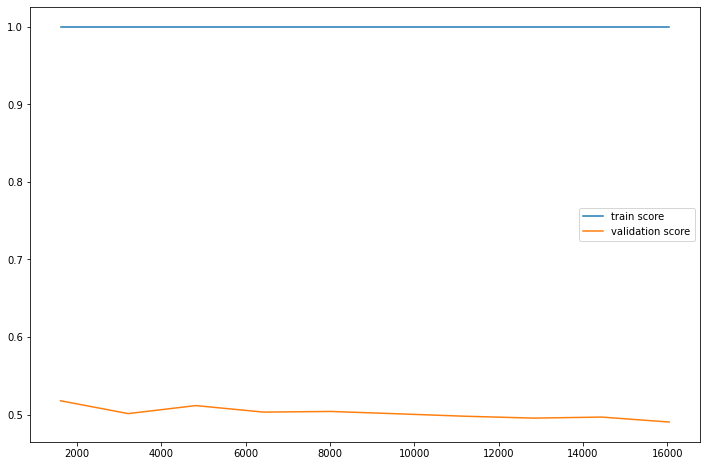

In [ ]:
evaluation(model_1)

In [1]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve